In [2]:
import pandas as pd
import json
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# show full text in dataframe display
pd.set_option('display.max_colwidth', None) 

## Load SAND Data
Load the test and dev data into different dataframes. (Currently don't have the training data -- I will poke that for count statistics separately.)

Includes the true labels, as well as the predicted labels from the two revised models in D4:
- Ensemble Decision Tree, trained on no-context RoBERTa models:
    - SARC-Finetuned RoBERTa
    - SAND-Finetuned RoBERTa

### Load in Texts and True Labels:

In [3]:
# Read in SAND Data from file
sand_dev_file = "../../data/scraped/dev.json"
sand_test_file = "../../data/scraped/test.json"

with open(sand_dev_file, 'r') as f:
    dev_data = json.load(f)

with open(sand_test_file, 'r') as f:
    test_data = json.load(f)

In [4]:
# Build SAND Dev DataFrame
dev_ids = {"id": list(dev_data.keys())}
dev_texts_labels = list(dev_data.values())

dev_id_df = pd.DataFrame(dev_ids)
dev_txt_lbl_df = pd.DataFrame(dev_texts_labels)

sand_dev_df = dev_id_df.join(dev_txt_lbl_df)

In [5]:
# Build SAND Test DataFrame
test_ids = {"id": list(test_data.keys())}
test_texts_labels = list(test_data.values())

test_id_df = pd.DataFrame(test_ids)
test_txt_lbl_df = pd.DataFrame(test_texts_labels)

sand_test_df = test_id_df.join(test_txt_lbl_df)

### Load in Predictions:
For `sand_dev_df`:
- `outputs/D4/adaptation/devtest/d4_ensemble_sarc_d3_model.out`
- `outputs/D4/adaptation/devtest/d4_roberta_sand_model.out`

For `sand_test_df`:
- `outputs/D4/adaptation/evaltest/d4_ensemble_sarc_d3_model.out`
- `outputs/D4/adaptation/evaltest/d4_roberta_sand_model.out`

In [6]:
# Add SAND Dev predictions:
ensemble_file = '../../outputs/D4/adaptation/devtest/d4_dual_trained_model.out'

with open(ensemble_file, 'r') as f:
    ensemble_preds = []
    for line in f.readlines():
        split_line = line.split(", ")
        ensemble_preds.append(split_line[0].split(": ")[1])

sand_dev_df['ensemble_pred'] = ensemble_preds
sand_dev_df.head(1)

,id,text,label,ensemble_pred
0,cu7n7ur,ADHD is a recognized disability with conditions as listed in this article. According to this website gt504 plans are for K12 public school students with disabilities. And according to their page on IEPs gtKids from age 3 through high school graduation or a maximum age of 22 whichever comes first may be eligible for an IEP. Please visit this page on this subs wiki for college assistance. If your college has their own health care system you might be able to get medication from them. I believe that if you are 18 or older according to HIPAA laws your parents do not have the right to your medical information even if their insurance is paying for it but this may depend upon the state in which you live. This PDF explains a little of it you can do a search in this PDF for 18 to find the relevant sections.,1,1


In [7]:
# Add SAND Test Predictions
ensemble_file = '../../outputs/D4/adaptation/evaltest/d4_dual_trained_model.out'

with open(ensemble_file, 'r') as f:
    ensemble_preds = []
    for line in f.readlines():
        split_line = line.split(", ")
        ensemble_preds.append(split_line[0].split(": ")[1])

sand_test_df['ensemble_pred'] = ensemble_preds
sand_test_df.head(1)

,id,text,label,ensemble_pred
0,jd7vd2q,Only if its a band I would like to see coming to town and I see something about it after the fact!,0,1


## Load SARC Data
Load the test and dev data into different dataframes.

Includes the true labels, as well as the predicted labels from the two revised models in D4:
- SAND-Finetuned RoBERTa
- Ensemble Decision Tree, trained on D3 models:
    - SARC-Finetuned BERT (no context)
    - SARC-Finetuned RoBERTa (no context)

NOTE: Because our D4 models don't use context, these columns (posts, post_ids, context_size) will be dropped.

### Load Text and True Labels

In [8]:
sarc_dev_file = "../../data/sarc/dev-comments-balanced.json"
sarc_test_file = "../../data/sarc/test-comments-balanced.json"

In [9]:
# Read in SARC data from file
with open(sarc_dev_file, 'r') as f:
    sarc_dev_data = json.load(f)
sarc_dev_df = pd.DataFrame.from_records(sarc_dev_data)

with open(sarc_test_file, 'r') as f:
    sarc_test_data = json.load(f)
sarc_test_df = pd.DataFrame.from_records(sarc_test_data)

# Drop cluttered columns (comment this out if you want SARC context)
sarc_dev_df = sarc_dev_df.drop(columns=["posts", "post_ids", "context_size"])
sarc_dev_df = sarc_dev_df.rename(columns={"response":"text", "response_id":"id"})

sarc_test_df = sarc_test_df.drop(columns=["posts", "post_ids", "context_size"])
sarc_test_df = sarc_test_df.rename(columns={"response":"text", "response_id":"id"})

### Load in Predictions:
For `sarc_dev_df`:
- `outputs/D4/primary/devtest/d4_ensemble_sarc_d3_model.out`
- `outputs/D4/primary/devtest/d4_roberta_sand_model.out`

For `sarc_test_df`:
- `outputs/D4/primary/evaltest/d4_ensemble_sarc_d3_model.out`
- `outputs/D4/primary/evaltest/d4_roberta_sand_model.out`

In [10]:
# Add SARC Dev predictions:
ensemble_file = '../../outputs/D4/primary/devtest/d4_dual_trained_model.out'

with open(ensemble_file, 'r') as f:
    ensemble_preds = []
    for line in f.readlines():
        split_line = line.split(", ")
        ensemble_preds.append(split_line[0].split(": ")[1])

sarc_dev_df['ensemble_pred'] = ensemble_preds
sarc_dev_df.head(1)

,id,text,label,ensemble_pred
0,c07fd66,Religion must have the answer,1,1


In [11]:
# Add SARC Test Predictions:
ensemble_file = '../../outputs/D4/primary/evaltest/d4_dual_trained_model.out'

with open(ensemble_file, 'r') as f:
    ensemble_preds = []
    for line in f.readlines():
        split_line = line.split(", ")
        ensemble_preds.append(split_line[0].split(": ")[1])

sarc_test_df['ensemble_pred'] = ensemble_preds
sarc_test_df.head(1)

,id,text,label,ensemble_pred
0,c07nkao,"Yes, cuz tax cuts will help those w/o jobs!",1,1


In [12]:
# Ensure all DFs are of correct dtype:
sand_dev_df = sand_dev_df.astype({'label': int, 'ensemble_pred': int})
sand_test_df = sand_test_df.astype({'label': int, 'ensemble_pred': int})
sarc_dev_df = sarc_dev_df.astype({'label': int, 'ensemble_pred': int})
sarc_test_df = sarc_test_df.astype({'label': int, 'ensemble_pred': int})

### Review of Loaded Dfs:
`sand_dev_df` - Adaptation task dev set

`sand_test_df` - Adaptation task test set

`sarc_dev_df` - Primary task dev set

`sarc_test_df` - Primary task test set

**Columns**
- `id` - The unique ID of the text ("response_id" in the original SARC data files)
- `text` - The text of the response used as input.
- `label` - The true label. 0 if non-sarcastic. 1 if sarcastic.
- `ensemble_pred` - The predicted label, as made by the D4 Decision Tree ensemble model.
- `d4_roberta_pred` - The predicted label, as made by the D4 SAND-Finetuned RoBERTa model.
    - `d4_roberta_neg` - The probability of the prediction "0"
    - `d4_roberta_pos` - The probability of the prediction "1"

## Descriptive Statistics:

In [13]:
# SAND Dev Label Count Stats:
print("SAND Dev True Label Counts:")
print(sand_dev_df['label'].value_counts())

print("\nSAND Dev Ensemble Pred Counts:")
print(sand_dev_df['ensemble_pred'].value_counts())

SAND Dev True Label Counts:
label
0    24881
1    23355
Name: count, dtype: int64

SAND Dev Ensemble Pred Counts:
ensemble_pred
0    24340
1    23896
Name: count, dtype: int64


In [14]:
# SAND Test Label Count Stats:
print("SAND Test True Label Counts:")
print(sand_test_df['label'].value_counts())

print("\nSAND Test Ensemble Pred Counts:")
print(sand_test_df['ensemble_pred'].value_counts())

SAND Test True Label Counts:
label
0    24721
1    23465
Name: count, dtype: int64

SAND Test Ensemble Pred Counts:
ensemble_pred
0    24367
1    23819
Name: count, dtype: int64


In [15]:
# SARC Dev Label Count Stats:
print("SARC Dev True Label Counts:")
print(sarc_dev_df['label'].value_counts())

print("\nSARC Dev Ensemble Pred Counts:")
print(sarc_dev_df['ensemble_pred'].value_counts())

SARC Dev True Label Counts:
label
1    12854
0    12854
Name: count, dtype: int64

SARC Dev Ensemble Pred Counts:
ensemble_pred
0    15469
1    10239
Name: count, dtype: int64


In [16]:
# SAND Test Label Count Stats:
print("SARC Test True Label Counts:")
print(sarc_test_df['label'].value_counts())

print("\nSARC Test Ensemble Pred Counts:")
print(sarc_test_df['ensemble_pred'].value_counts())

SARC Test True Label Counts:
label
1    32333
0    32333
Name: count, dtype: int64

SARC Test Ensemble Pred Counts:
ensemble_pred
0    38727
1    25939
Name: count, dtype: int64


SAND vs SARC Data Stats

In [17]:
# Text length
print('SAND DATA')
print('------------------------------')
print(sand_dev_df['text'].str.len())
print('Average text length (chars):', sand_dev_df['text'].apply(len).mean())
print('Min text length:', sand_dev_df['text'].apply(len).min())
print('Max text length:', sand_dev_df['text'].apply(len).max())

print('SARC DATA')
print('------------------------------')
print(sarc_dev_df['text'].str.len())
print('Average text length (chars):', sarc_dev_df['text'].apply(len).mean())
print('Min text length:', sarc_dev_df['text'].apply(len).min())
print('Max text length:', sarc_dev_df['text'].apply(len).max())

SAND DATA
------------------------------
0         815
1         104
2         570
3          28
4         158
         ... 
48231     399
48232     959
48233     257
48234    3860
48235     221
Name: text, Length: 48236, dtype: int64
Average text length (chars): 699.6359565469774
Min text length: 0
Max text length: 25183
SARC DATA
------------------------------
0        29
1        85
2        62
3        97
4        88
         ..
25703    33
25704    14
25705    94
25706    36
25707    22
Name: text, Length: 25708, dtype: int64
Average text length (chars): 54.969425859654585
Min text length: 1
Max text length: 1114


In [19]:
# Length of training data - takes a while to load
sarc_train = pd.read_csv('../../data/sarc/train-balanced.csv')  # DOWNLOADED FROM SARC GITHUB
sand_train = pd.read_json('../../data/scraped/train.json')  # DOWNLOADED FROM HUGGINGFACE
sand_train = sand_train.transpose()

print('SARC training instances:', len(sarc_train)*2)
print('SAND training instances:', len(sand_train))

SARC training instances: 257080
SAND training instances: 337782


## Heatmaps

In [20]:
# confusion matrices for all tests:
sarc_dev_matrix = confusion_matrix(sarc_dev_df['label'], sarc_dev_df['ensemble_pred'])
sarc_test_matrix = confusion_matrix(sarc_test_df['label'], sarc_test_df['ensemble_pred'])
sand_dev_matrix = confusion_matrix(sand_dev_df['label'], sand_dev_df['ensemble_pred'])
sand_test_matrix = confusion_matrix(sand_test_df['label'], sand_test_df['ensemble_pred'])

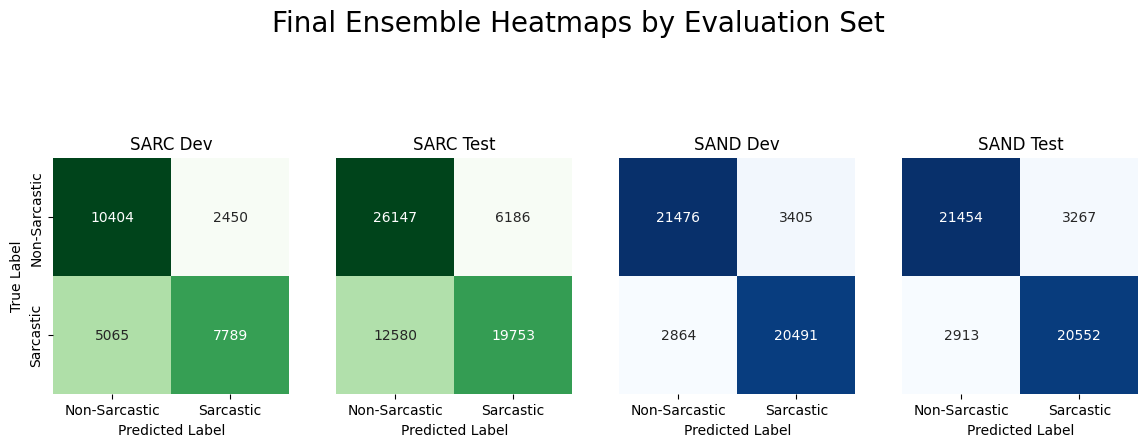

In [25]:
# add all heatmaps to one plot:
fig, axes = plt.subplots(1, 4, figsize=(14, 5.5))
fig.suptitle('Final Ensemble Heatmaps by Evaluation Set', fontsize=20)

sns.heatmap(sarc_dev_matrix, ax=axes[0], cbar=False, square=True, annot=True, fmt='g', cmap="Greens", xticklabels=["Non-Sarcastic", "Sarcastic"], yticklabels=["Non-Sarcastic", "Sarcastic"])
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
axes[0].set_title('SARC Dev')

sns.heatmap(sarc_test_matrix, ax=axes[1], cbar=False, square=True, annot=True, fmt='g', cmap="Greens", xticklabels=["Non-Sarcastic", "Sarcastic"], yticklabels=False)
axes[1].set_xlabel('Predicted Label')
axes[1].set_title('SARC Test')

sns.heatmap(sand_dev_matrix, ax=axes[2], cbar=False, square=True, annot=True, fmt='g', cmap="Blues", xticklabels=["Non-Sarcastic", "Sarcastic"], yticklabels=False)
axes[2].set_xlabel('Predicted Label')
axes[2].set_title('SAND Dev')

sns.heatmap(sand_test_matrix, ax=axes[3], cbar=False, square=True, annot=True, fmt='g', cmap="Blues", xticklabels=["Non-Sarcastic", "Sarcastic"], yticklabels=False)
axes[3].set_xlabel('Predicted Label')
axes[3].set_title('SAND Test')

plt.savefig('../images/final_eval_heatmaps.png')
plt.show()